In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import import_ipynb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_curve, f1_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier #https://xgboost.readthedocs.io/en/release_3.0.0/get_started.html
from sklearn.cluster import KMeans 
from pyclustering.utils.metric import distance_metric, type_metric
import numpy as np
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
import matplotlib.pyplot as plt 
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer
from sklearn.manifold import TSNE
from pyclustering.cluster.silhouette import silhouette
from sklearn.inspection import permutation_importance
import shap
import warnings
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
import pickle
from sklearn import metrics
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
warnings.filterwarnings("ignore")

In [4]:
%run data_transformation.ipynb
%run trainmodel.ipynb
%run imbalancehandler.ipynb
%run neuralnetwork.ipynb
%run unsupervisedpart.ipynb
%run probnn.ipynb
%run autoencoder.ipynb
%run convolutionalnn.ipynb
%run fraudpipeline.ipynb

In [5]:
MODEL_DICT = {
    "logistic_regression": LogisticRegression,
    "random_forest": RandomForestClassifier,
    "svm": SVC,
    "gaussian_nb": GaussianNB,
    "decision_trees": DecisionTreeClassifier,
    "xgb": XGBClassifier,
    "adaboost": AdaBoostClassifier
}

PARAM_GRID = {
    "logistic_regression": {
        "C": np.logspace(-3, 2, 6),
        "penalty": ["l1", "l2"],
        "solver": ["saga", "liblinear"]  
    },
    "random_forest": {
        "n_estimators": [100],
        "max_depth": [5, 10],
        "min_samples_leaf": [1, 2],
        "criterion": ["gini", "entropy"]
    },
    "svm": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "gaussian_nb": {
        "var_smoothing": np.logspace(-2, -9, num=3)   
    },
    "decision_trees":{
        "criterion": ["gini", "entropy"]
    },
    "xgb": {
        "n_estimators": [50, 100, 200],
        "max_depth" : [4, 6],
        "learning_rate": [0.01, 0.05, 0.1]
    },


    "adaboost":{
        "learning_rate": [0.1, 0.01]
    }
        
}    

#bin_pipeline here

#****

pipeline_numerical = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = "median")),
        ('scaler', StandardScaler())
         ]
)


pipeline_categorical = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot_encoder', OneHotEncoder())
    ]     
)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

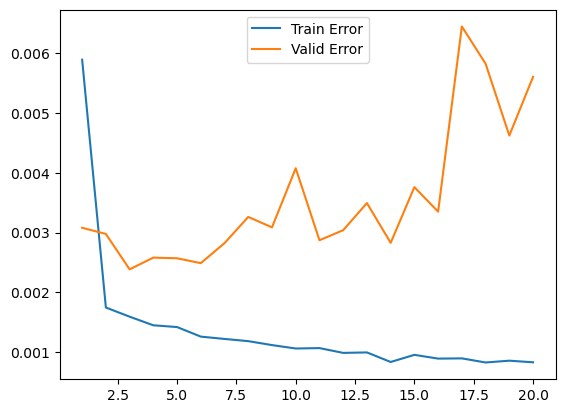

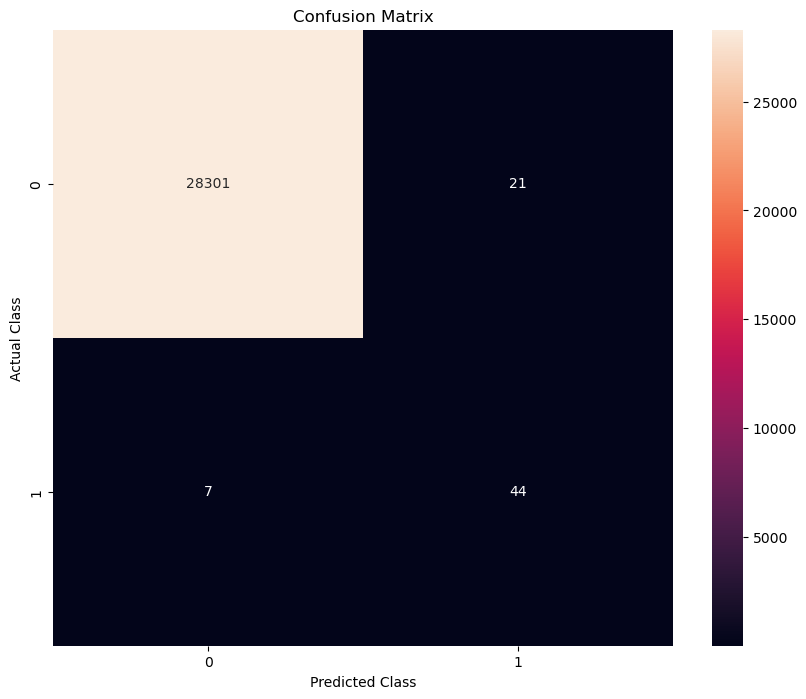

Finished


In [34]:
data = DataGathering(file_path="creditcard.csv", target="Class", batch_size = 64, pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, val_size=0.5, data_type=torch.float32)
preprocessor = data.get_data_objects()
X_train, y_train, X_test, y_test = data.main_split()
X_train_p = preprocessor.fit_transform(X_train)
cols = preprocessor.get_feature_names_out()

generator = Generator(noise=64, output=30, hidden = 64)
discriminator = Discriminator(input_dim = 30, hidden = 64)
gan = Gan(generator, discriminator, lr_g =0.01, lr_d = 0.01)
imbalance_handler = ImbalanceHandler(method = "gan", gan = gan, gan_epochs=10, gan_noise=64, columns=cols)
aenet = NeuralN(input_dimension = 30, output_dimension=1, num_hidden_layers = 4, data_type=torch.float32, loss_method="BCEwLogit", opt_method = "Adam", lr = 0.001, alpha=0.8, gamma=2, threshold=0.15, epochs=20)

model = FraudDetectionPipeline(data=data, imbalance_handler = imbalance_handler, neural_networks=aenet)
FraudDetectionPipeline.run_neuralnetwork(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

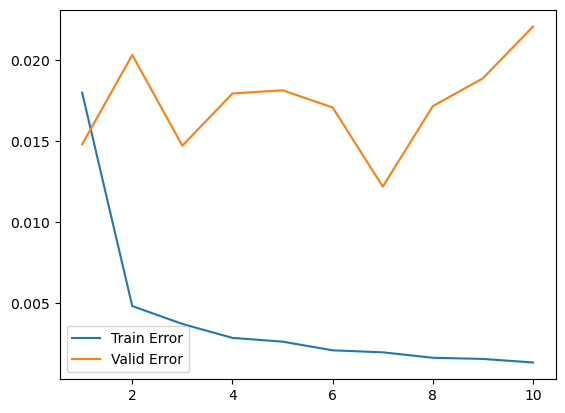

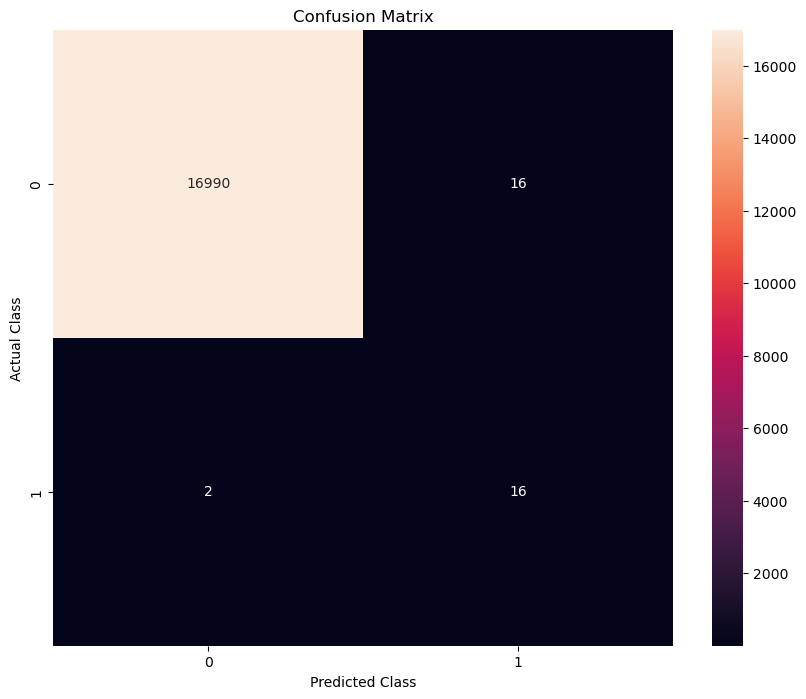

Finished


In [32]:
data = DataGathering(file_path="creditcard.csv", target="Class", pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, data_type = torch.float32, batch_size = 64)
imbalance_handler = ImbalanceHandler(method = "smote")
neunet = NeuralN(input_dimension = 30, output_dimension = 1, num_hidden_layers = 4, threshold = 0.3, data_type=torch.float32, loss_method="BCEwLogit", opt_method = "Adam", lr = 0.001, alpha = 0.25, gamma = 2, epochs=10)

model = FraudDetectionPipeline(data=data, imbalance_handler=imbalance_handler, neural_networks=neunet)
FraudDetectionPipeline.run_neuralnetwork(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
    

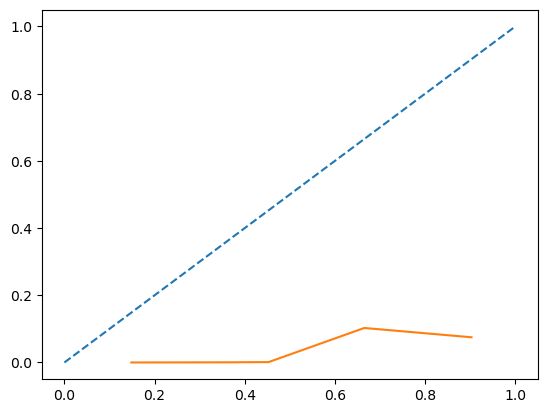

Shapley Values ************ 


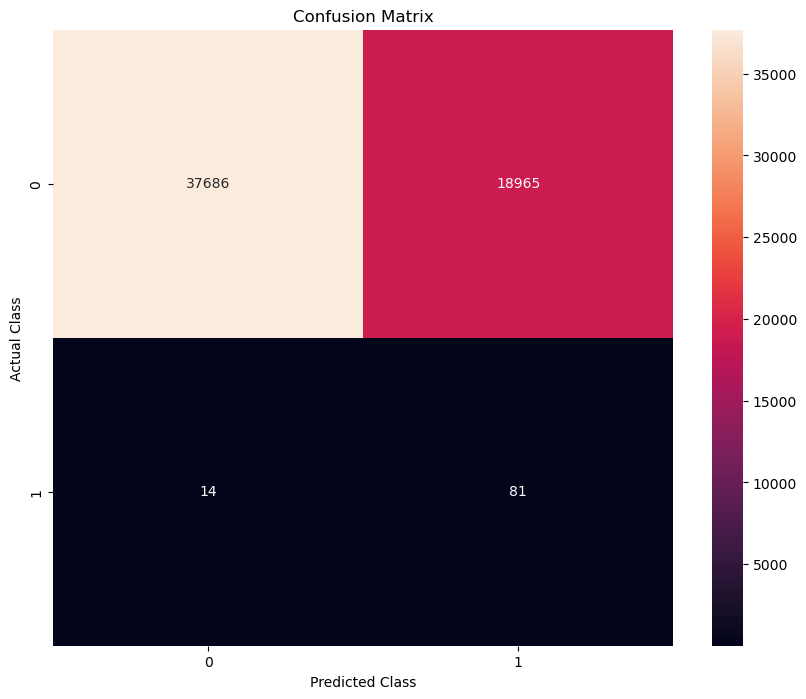

Finished


In [36]:
data = DataGathering(file_path="creditcard.csv", target= "Class", pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, test_size = 0.2, calibration_size = 0.15)
imbalance_handler = ImbalanceHandler(method = "undersampling")
trainer = TrainModel(search_strategy = "random", param_grid = PARAM_GRID, performance_measure = "f1", cv = 4, n_jobs = -1, verbose = 3, dimensionality_reduction= "pca", n_components = 10,  model_dictionary = MODEL_DICT, threshold = 0.45, calibration_needed = "yes")

model = FraudDetectionPipeline(data=data, imbalance_handler=imbalance_handler, trainer=trainer)
FraudDetectionPipeline.run_supervisedmodels(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer_num',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 [])])


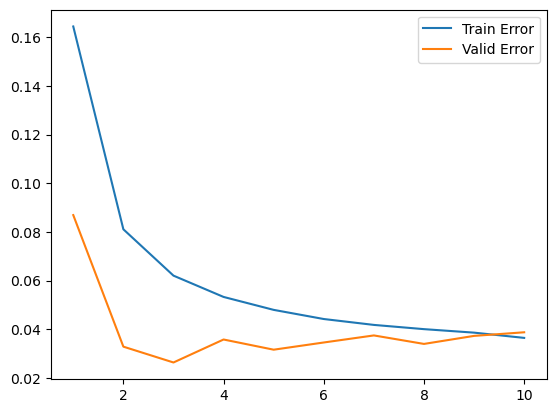

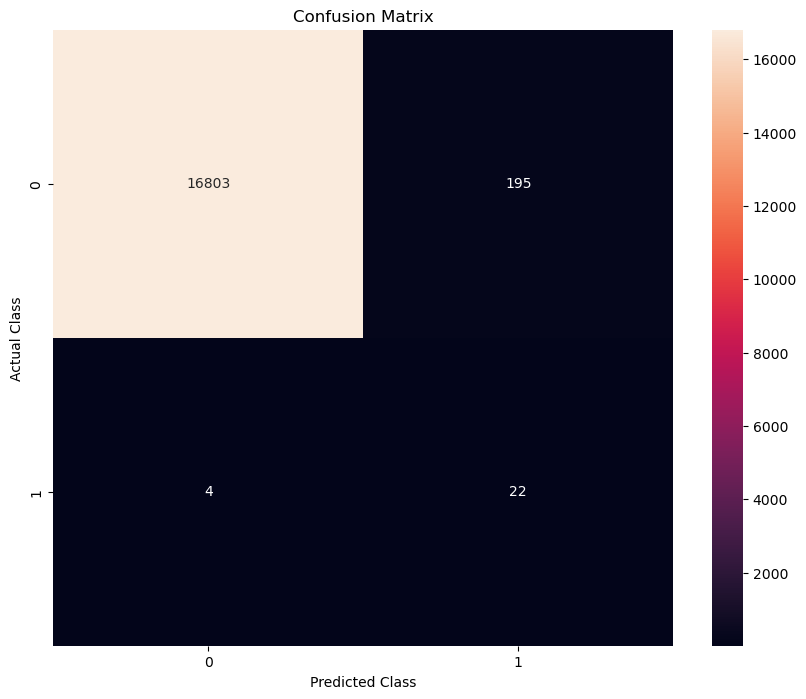

Finished


In [37]:
data = DataGathering(file_path="creditcard.csv", target="Class", pipeline_num_list = ["imputer_num", "scaler"], pipeline_cat_list = ["imputer_cat", "onehot"], data_type = torch.float32, batch_size = 64)
imbalance_handler = ImbalanceHandler(method = "undersampling")
neunet = NeuralN(input_dimension = 30, output_dimension = 1, hidden_layers=[64, 128, 64, 32, 16], threshold = 0.65, data_type=torch.float32, activations = ["relu", "tanh"], loss_method="MSE", opt_method = "Adam", lr = 0.001, alpha = 0.25, gamma = 2, epochs=10)

model = FraudDetectionPipeline(data=data, imbalance_handler=imbalance_handler, neural_networks=neunet)
FraudDetectionPipeline.run_neuralnetwork(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer_num',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 [])])


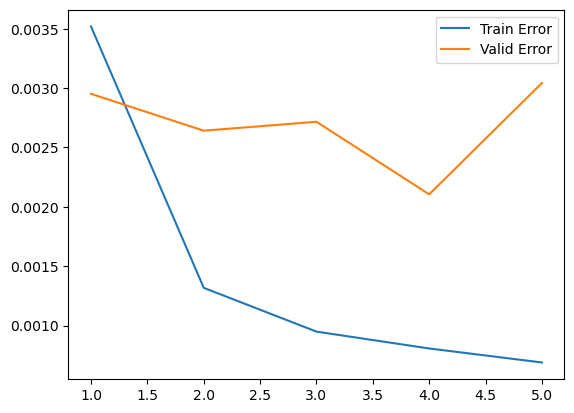

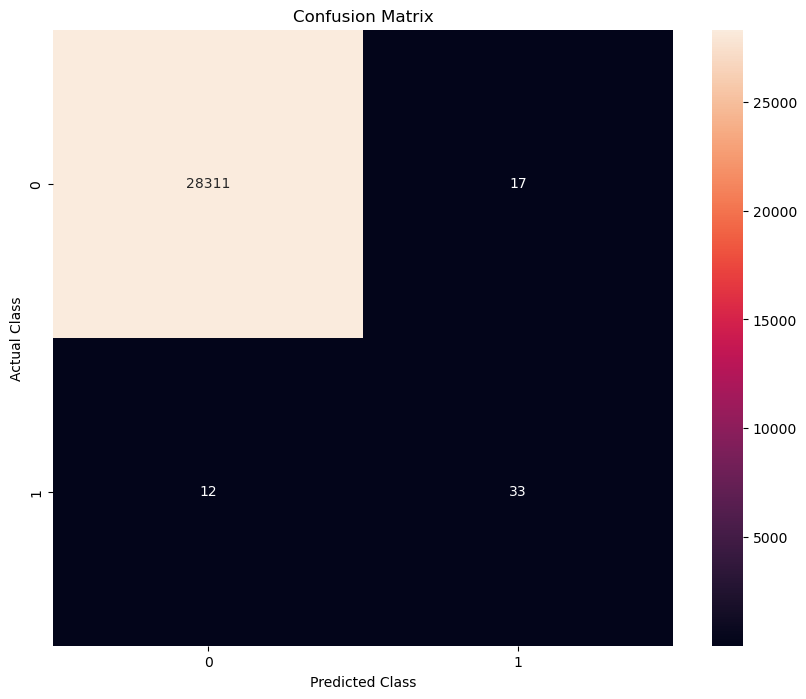

Finished


In [38]:
data = DataGathering(file_path="creditcard.csv", target="Class", pipeline_num_list = ["imputer_num", "scaler"], pipeline_cat_list = ["imputer_cat", "onehot"], data_type = torch.float32, batch_size = 64, val_size = 0.5)
imbalance_handler = ImbalanceHandler(method = "oversampling")
neunet = NeuralN(input_dimension = 30, output_dimension = 1, hidden_layers=[64, 128, 64, 32, 16], threshold = 0.45, data_type=torch.float32, activations = ["relu", "tanh","relu", "relu"], loss_method="focal_loss", opt_method = "Adam", lr = 0.001, alpha = 0.85, gamma = 2, epochs=5)

model = FraudDetectionPipeline(data=data, imbalance_handler=imbalance_handler, neural_networks=neunet)
FraudDetectionPipeline.run_neuralnetwork(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/env/lib/python3.10/site-packages/sklearn

*****************************************
Best scores for each model
{'logistic_regression': GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Time',
                                                                          'V1',
                                                                          'V2',
                                                                

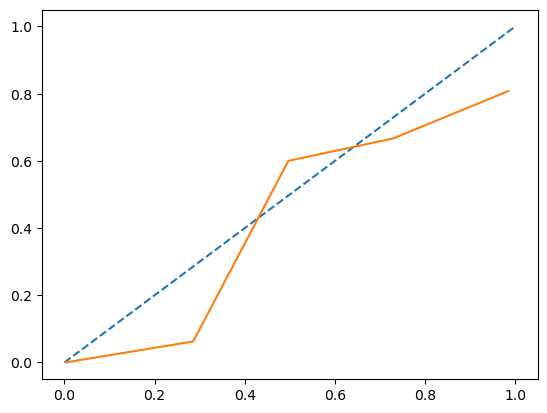

Shapley Values ************ 


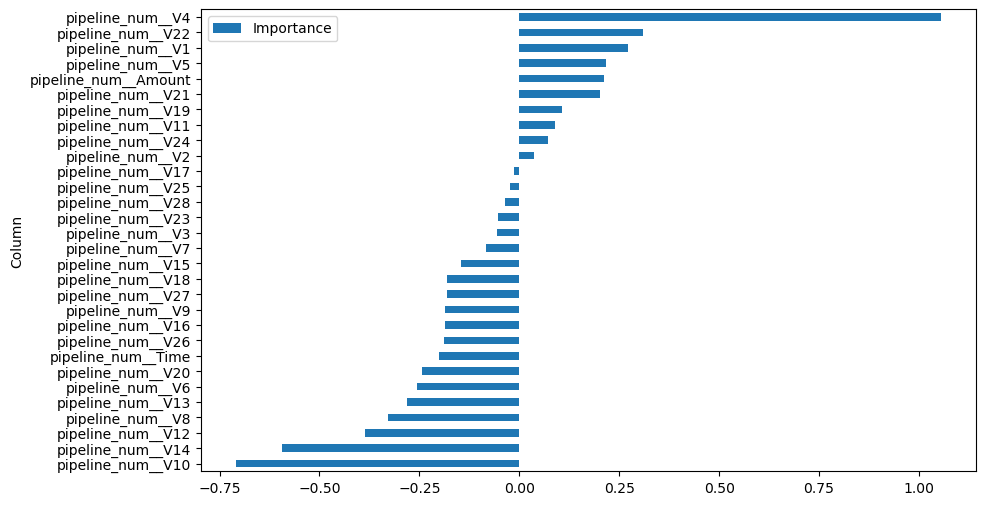

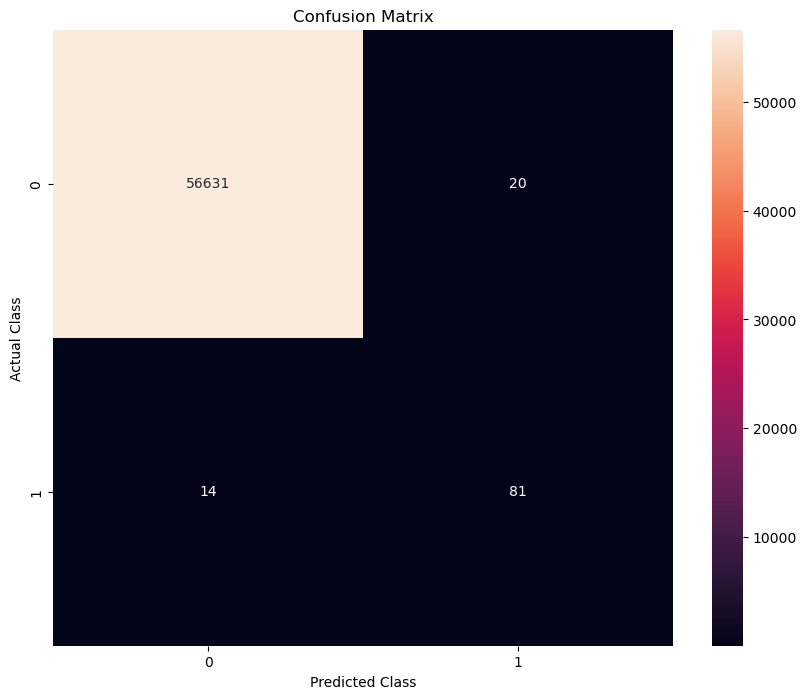

Finished
[CV 2/2] END logistic_regression__C=0.001, logistic_regression__class_weight={0: 1, 1: 10}, logistic_regression__penalty=l1, logistic_regression__solver=liblinear;, score=0.710 total time=   1.0s
[CV 2/2] END logistic_regression__C=0.01, logistic_regression__class_weight={0: 1, 1: 10}, logistic_regression__penalty=l1, logistic_regression__solver=liblinear;, score=0.733 total time=   0.9s
[CV 2/2] END logistic_regression__C=0.01, logistic_regression__class_weight={0: 1, 1: 10}, logistic_regression__penalty=l2, logistic_regression__solver=liblinear;, score=0.741 total time=   0.9s
[CV 2/2] END logistic_regression__C=0.1, logistic_regression__class_weight={0: 1, 1: 10}, logistic_regression__penalty=l1, logistic_regression__solver=saga;, score=0.737 total time=   6.5s
[CV 2/2] END logistic_regression__C=1.0, logistic_regression__class_weight={0: 1, 1: 10}, logistic_regression__penalty=l2, logistic_regression__solver=liblinear;, score=0.740 total time=   1.2s
[CV 2/2] END logistic_

In [62]:
data = DataGathering(file_path="creditcard.csv", target= "Class", pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, test_size = 0.2, calibration_size = 0.15)
imbalance_handler = ImbalanceHandler(method = "classweights", class_weights = {0: 1, 1:10})
trainer = TrainModel(search_strategy = "grid", param_grid = PARAM_GRID, performance_measure = "average_precision", cv = 2, n_jobs = -1, verbose = 3,  model_dictionary = MODEL_DICT, threshold = 0.45, calibration_needed = "yes")

model = FraudDetectionPipeline(data=data, imbalance_handler=imbalance_handler, trainer=trainer)
FraudDetectionPipeline.run_supervisedmodels(model)

ModuleDict(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (act0): ReLU()
  (pooling0): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout0): Dropout(p=0.3, inplace=False)
  (conv2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (act1): ReLU()
  (pooling1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (act2): Identity()
  (pooling2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)
ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V

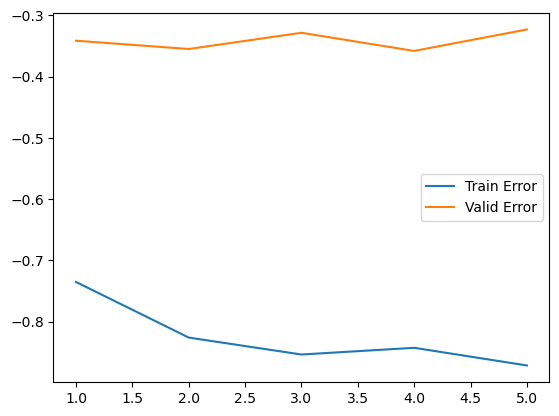

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [19.2000],
        [ 0.0000],
        [ 1.0176],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.

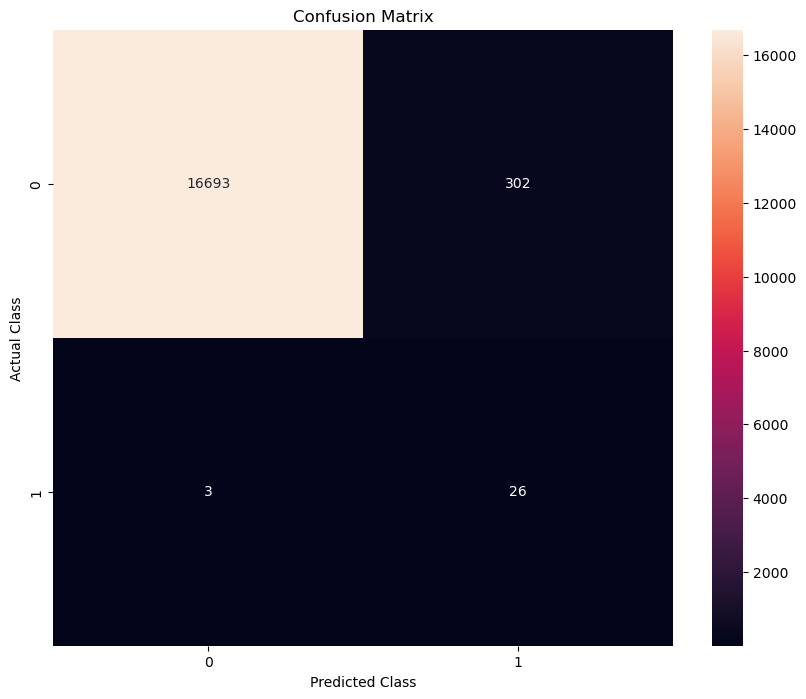

Finished


In [39]:
data = DataGathering(file_path="creditcard.csv", target="Class", batch_size = 64, pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, data_type = torch.float32)
imbalance_handler = ImbalanceHandler(method = "undersampling")
cnn = ConvolutionNN(layer_list   = [1, 16, 16, 32],pool  = [2,  2],activations  = ['relu', 'relu'], kernel= 3, padding = 1,dropout_list = [0.3, 0.3], flattened_size = 96,linear_layer = 64, output_dimension = 1, loss_method = "BCEwLogit", threshold=0.65,  opt_method = "Adam", lr = 0.01)

model = FraudDetectionPipeline(data = data, imbalance_handler = imbalance_handler, convolutional_nn = cnn)
FraudDetectionPipeline.run_cnn(model)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

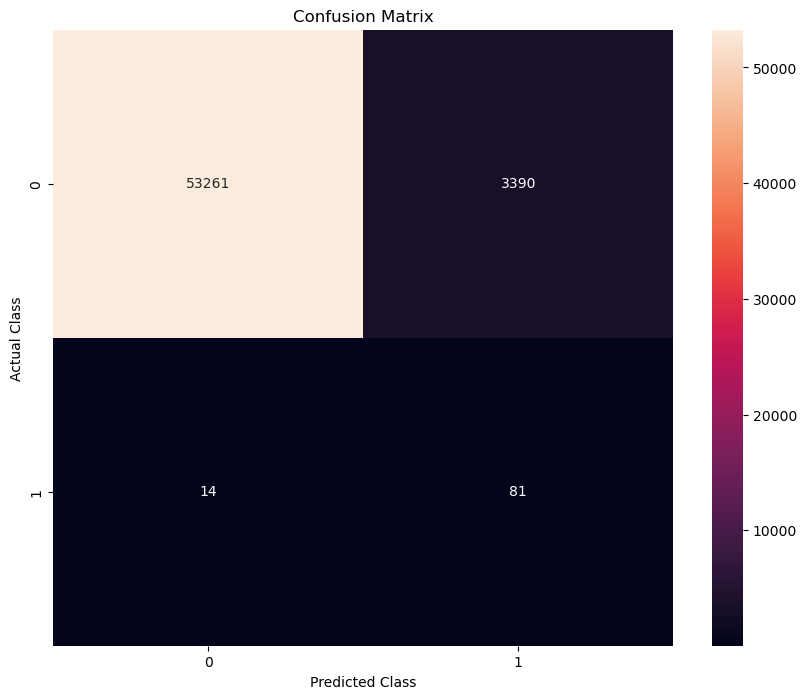

Finished


In [6]:
data = DataGathering(file_path="creditcard.csv", target="Class", pipeline_numerical = pipeline_numerical,pipeline_categorical = pipeline_categorical)
imbalance_handler = ImbalanceHandler(method = "undersampling")

model = FraudDetectionPipeline(data = data, imbalance_handler = imbalance_handler)
FraudDetectionPipeline.run_pnn(model, kernel="gaussian", bandwidth=0.2)

ColumnTransformer(transformers=[('pipeline_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount']),
                                ('pipeline_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
      

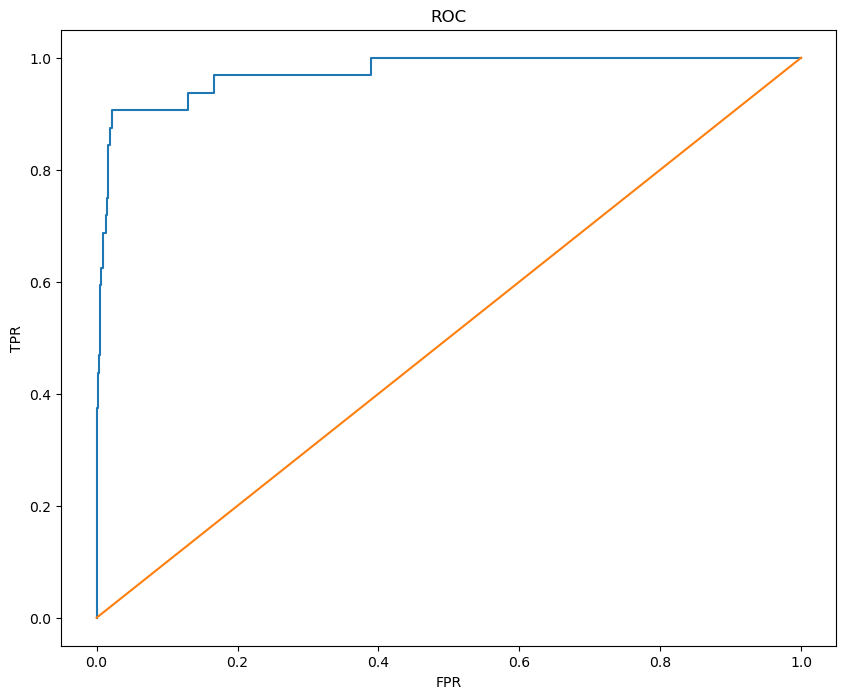

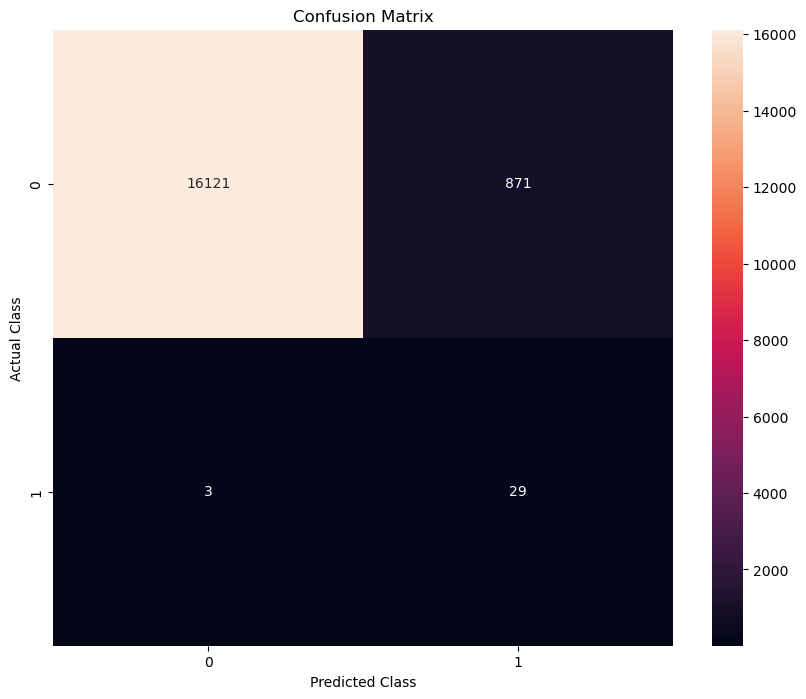

Finished


In [41]:
data = DataGathering(file_path="creditcard.csv", target="Class", batch_size = 64, pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical, autoencoder = "yes")
imbalance_handler = ImbalanceHandler(method = "none")
aenet = AutoEncoder(input_dimension = 30, latent_dim = 4, num_hidden_layers=4, hidden_dim=16, activations = ["relu", "relu","relu", "relu"], loss_method="MSE", opt_method = "SGD", lr = 0.01, reconstruction_threshold=1.9, epochs=10)

model = FraudDetectionPipeline(data=data, imbalance_handler = imbalance_handler, auto_encoders=aenet)
FraudDetectionPipeline.run_autoencoder(model)

In [ ]:
DISTANCE_METRICS = {
        "euclidean" : type_metric.EUCLIDEAN,
        "squared euclidean" : type_metric.EUCLIDEAN_SQUARE,
        "manhattan" : type_metric.MANHATTAN,
        "chebyshev": type_metric.CHEBYSHEV,
        "canberra" : type_metric.CANBERRA,
        "chi_square" : type_metric.CHI_SQUARE
        
}
    
METHODS = ['kmeans', 'dbscan']
    
    #Unsupervised learning
data = DataGathering(file_path="creditcard.csv", pipeline_numerical = pipeline_numerical, pipeline_categorical = pipeline_categorical)
trainer_uns = UnsupervisedTraining(n_clusters = 3, 
                                    eps = 3, min_samples = 3)
    
model = FraudDetectionPipeline(data=data, unsupervised_clustering=trainer_uns)
FraudDetectionPipeline.run_unsupervisedclustering(model)